In [6]:
!pip install ipython-autotime 

time: 0 ns (started: 2024-11-16 21:07:27 +11:00)


In [1]:
%load_ext autotime

time: 0 ns (started: 2024-11-19 16:22:13 +11:00)


In [5]:
!pip install bing-image-downloader
!mkdir i2mages

time: 11.1 s (started: 2024-11-16 19:47:22 +11:00)


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from bing_image_downloader import downloader
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
import requests
from io import BytesIO

time: 5.38 s (started: 2024-11-19 16:22:15 +11:00)


In [8]:
downloader.download("sunflower", limit=30, output_dir='i2mages', adult_filter_off=True)

[%] Downloading Images to C:\Users\Admin\image1\i2mages\sunflower


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://upload.wikimedia.org/wikipedia/commons/4/40/Sunflower_sky_backdrop.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://awkwardbotany.files.wordpress.com/2014/11/common-sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://upload.wikimedia.org/wikipedia/commons/b/bf/Sunflower_from_Silesia.JPG
[%] File Downloaded !

[%] Downloading Image #4 from https://jooinn.com/images/sunflower-plant.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://upload.wikimedia.org/wikipedia/commons/5/5d/Sunflower_head.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.howtogrowstuff.com/wp-content/uploads/Sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://upload.wikimedia.org/wikipedia/commons/a/a9/A_sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #8 from 

In [4]:
downloader.download("rugby ball", limit=30, output_dir='i2mages', adult_filter_off=True)

[%] Downloading Images to C:\Users\Admin\image1\i2mages\rugby ball


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://images-na.ssl-images-amazon.com/images/I/919WOjzOY6L._AC_SL1500_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cataloguesports.com.au/wp-content/uploads/2014/06/Gilbert-Barbarian.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://res.cloudinary.com/moresport/image/upload/c_fill,q_auto:good,w_950/v1575961299/uploads/assets/1040611b-LHF.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://d3n4hccmbcfj87.cloudfront.net/uploads/2020/02/117244-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://nwscdn.com/media/catalog/product/d/o/dominate-rugby-ball_7.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cataloguesports.com.au/wp-content/uploads/2014/06/Dimension.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.bigw.com.au/medias/sys_maste

In [3]:
downloader.download("Ice cream cone", limit=30, output_dir='i2mages', adult_filter_off=True)

[%] Downloading Images to C:\Users\Admin\image1\i2mages\Ice cream cone


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i0.wp.com/northogdenconnection.com/wp-content/uploads/2020/06/AdobeStock_267330679.jpeg?w=2169&amp;ssl=1
[%] File Downloaded !

[%] Downloading Image #2 from https://static01.nyt.com/images/2013/06/02/magazine/02wmt/02wmt-superJumbo-v3.jpg?quality=90&amp;auto=webp
[%] File Downloaded !

[%] Downloading Image #3 from https://static.fanpage.it/wp-content/uploads/sites/22/2018/07/coni.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.shutterstock.com/shutterstock/photos/201425834/display_1500/stock-photo-chocolate-vanilla-and-strawberry-ice-cream-in-the-cone-on-white-background-with-clipping-path-201425834.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://thumbs.dreamstime.com/z/six-ice-cream-cones-6-different-flavors-1013101.jpg
[!] Issue getting: https://thumbs.dreamstime.com/z/six-ice-cr

In [3]:
DATADIR = 'i2mages'
CATEGORIES = ['Ice cream cone', 'rugby ball', 'sunflower']

target = [] 
images = []  
flat_data = [] 

for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        if img.endswith(('.jpg', '.png', '.jpeg', '.JPG', '.gif')):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (150, 150, 3))
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 4min 1s (started: 2024-11-19 16:22:23 +11:00)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=109)

time: 156 ms (started: 2024-11-19 16:26:50 +11:00)


In [5]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 25s (started: 2024-11-19 16:26:54 +11:00)


In [6]:
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_pred, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))

Accuracy: 0.8888888888888888
Confusion Matrix:
 [[ 8  1  1]
 [ 0 10  1]
 [ 0  0  6]]
time: 422 ms (started: 2024-11-19 16:28:55 +11:00)


In [7]:
pickle.dump(clf, open('img_model.p', 'wb'))

time: 78 ms (started: 2024-11-19 16:28:58 +11:00)


Enter your URL:  https://th.bing.com/th/id/R.88106545296550368e7721cb7152e754?rik=GVcigjl%2bB2c1jA&pid=ImgRaw&r=0


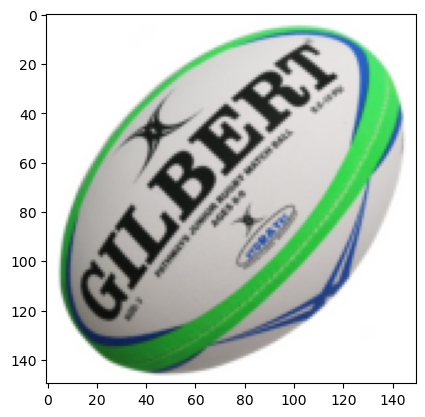

Predicted Output: rugby ball
time: 21.4 s (started: 2024-11-17 16:55:03 +11:00)


In [23]:
flat_data = []
url = input('Enter your URL: ')

# Fetch the image from the URL
response = requests.get(url)
if response.status_code == 200:
    # Convert the response content to a bytes stream
    image_data = BytesIO(response.content)
    # Read the image from the stream
    img = imread(image_data)
    img_resized = resize(img, (150, 150, 3))  # Resize the image
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)

    # Display the resized image
    plt.imshow(img_resized)
    plt.show()

    # Predict the category
    y_out = clf.predict(flat_data)
    print(f'Predicted Output: {CATEGORIES[y_out[0]]}')
else:
    print("Failed to fetch the image. Please check the URL.")



In [ ]:
import requests
import base64

# Prepare the image data
image_paths = ['image1.jpg', 'image2.jpg']  # Replace with your image paths
images = []

for path in image_paths:
    with open(path, 'rb') as img_file:
        images.append(base64.b64encode(img_file.read()).hex())

# Send the batch request
url = "http://127.0.0.1:5000/predict"
response = requests.post(url, json={"images": images})

# Print the response
print(response.json())


#Note: This will only work once your Flask server is running. Make sure you start the Flask app in a separate terminal